Look at priors

In [1]:
# Imports
import os
import glob
import numpy as np
import pandas as pd
import nibabel as nib
import brainbox as bb
import nilearn as nil
import statsmodels.api as sm
from scipy import stats as st
from matplotlib import gridspec
from scipy import cluster as scl
from nilearn import plotting as nlp
from matplotlib import pyplot as plt
from sklearn import linear_model as slin
from statsmodels.sandbox import stats as sts
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.sandbox.stats import multicomp as smi

In [2]:
%matplotlib inline

In [3]:
# Paths
scale = 7
prior_path = '/data1/cambridge/template/template_cambridge_basc_multiscale_sym_scale{:03d}.nii.gz'.format(scale)
mask_path = '/data1/abide/Mask/mask_data_specific.nii.gz'

In [4]:
# Define a new colormap
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 1.0, 1.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.0, 0.0),
                   (0.75, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (0.25, 1.0, 1.0),
                   (0.5, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
hotcold = LinearSegmentedColormap('hotcold', cdict)

In [5]:
# Get the mask
m_img = nib.load(mask_path)
mask_data = m_img.get_data()
mask = mask_data != 0

In [14]:
def show_scales(scale):
    prior_path = '/data1/cambridge/template/template_cambridge_basc_multiscale_sym_scale{:03d}.nii.gz'.format(scale)
    p_img = nib.load(prior_path)
    prior = p_img.get_data()
    # Turn the priors into an image
    prior = nib.load(prior_path)
    prior_data = prior.get_data()
    prior_temp = np.zeros((prior_data.shape + (scale,)))
    for sc_id in range(scale):
        tmp = np.zeros_like(prior_data)
        tmp[prior_data==sc_id+1] = sc_id + 1
        prior_temp[..., sc_id] = tmp
    prior_img = nib.Nifti1Image(prior_temp, affine=m_img.get_affine(), header=m_img.get_header())
    
    fig = plt.figure(figsize=(24,50))
    for net_id in np.arange(scale):
        ax1 = fig.add_subplot(scale,1,net_id+1)
        nlp.plot_glass_brain(nil.image.index_img(prior_img, net_id), cmap=plt.cm.spectral, 
                             axes=ax1, colorbar=False, title='Prior of network {}'.format(net_id+1),
                            vmin=1, vmax=scale)

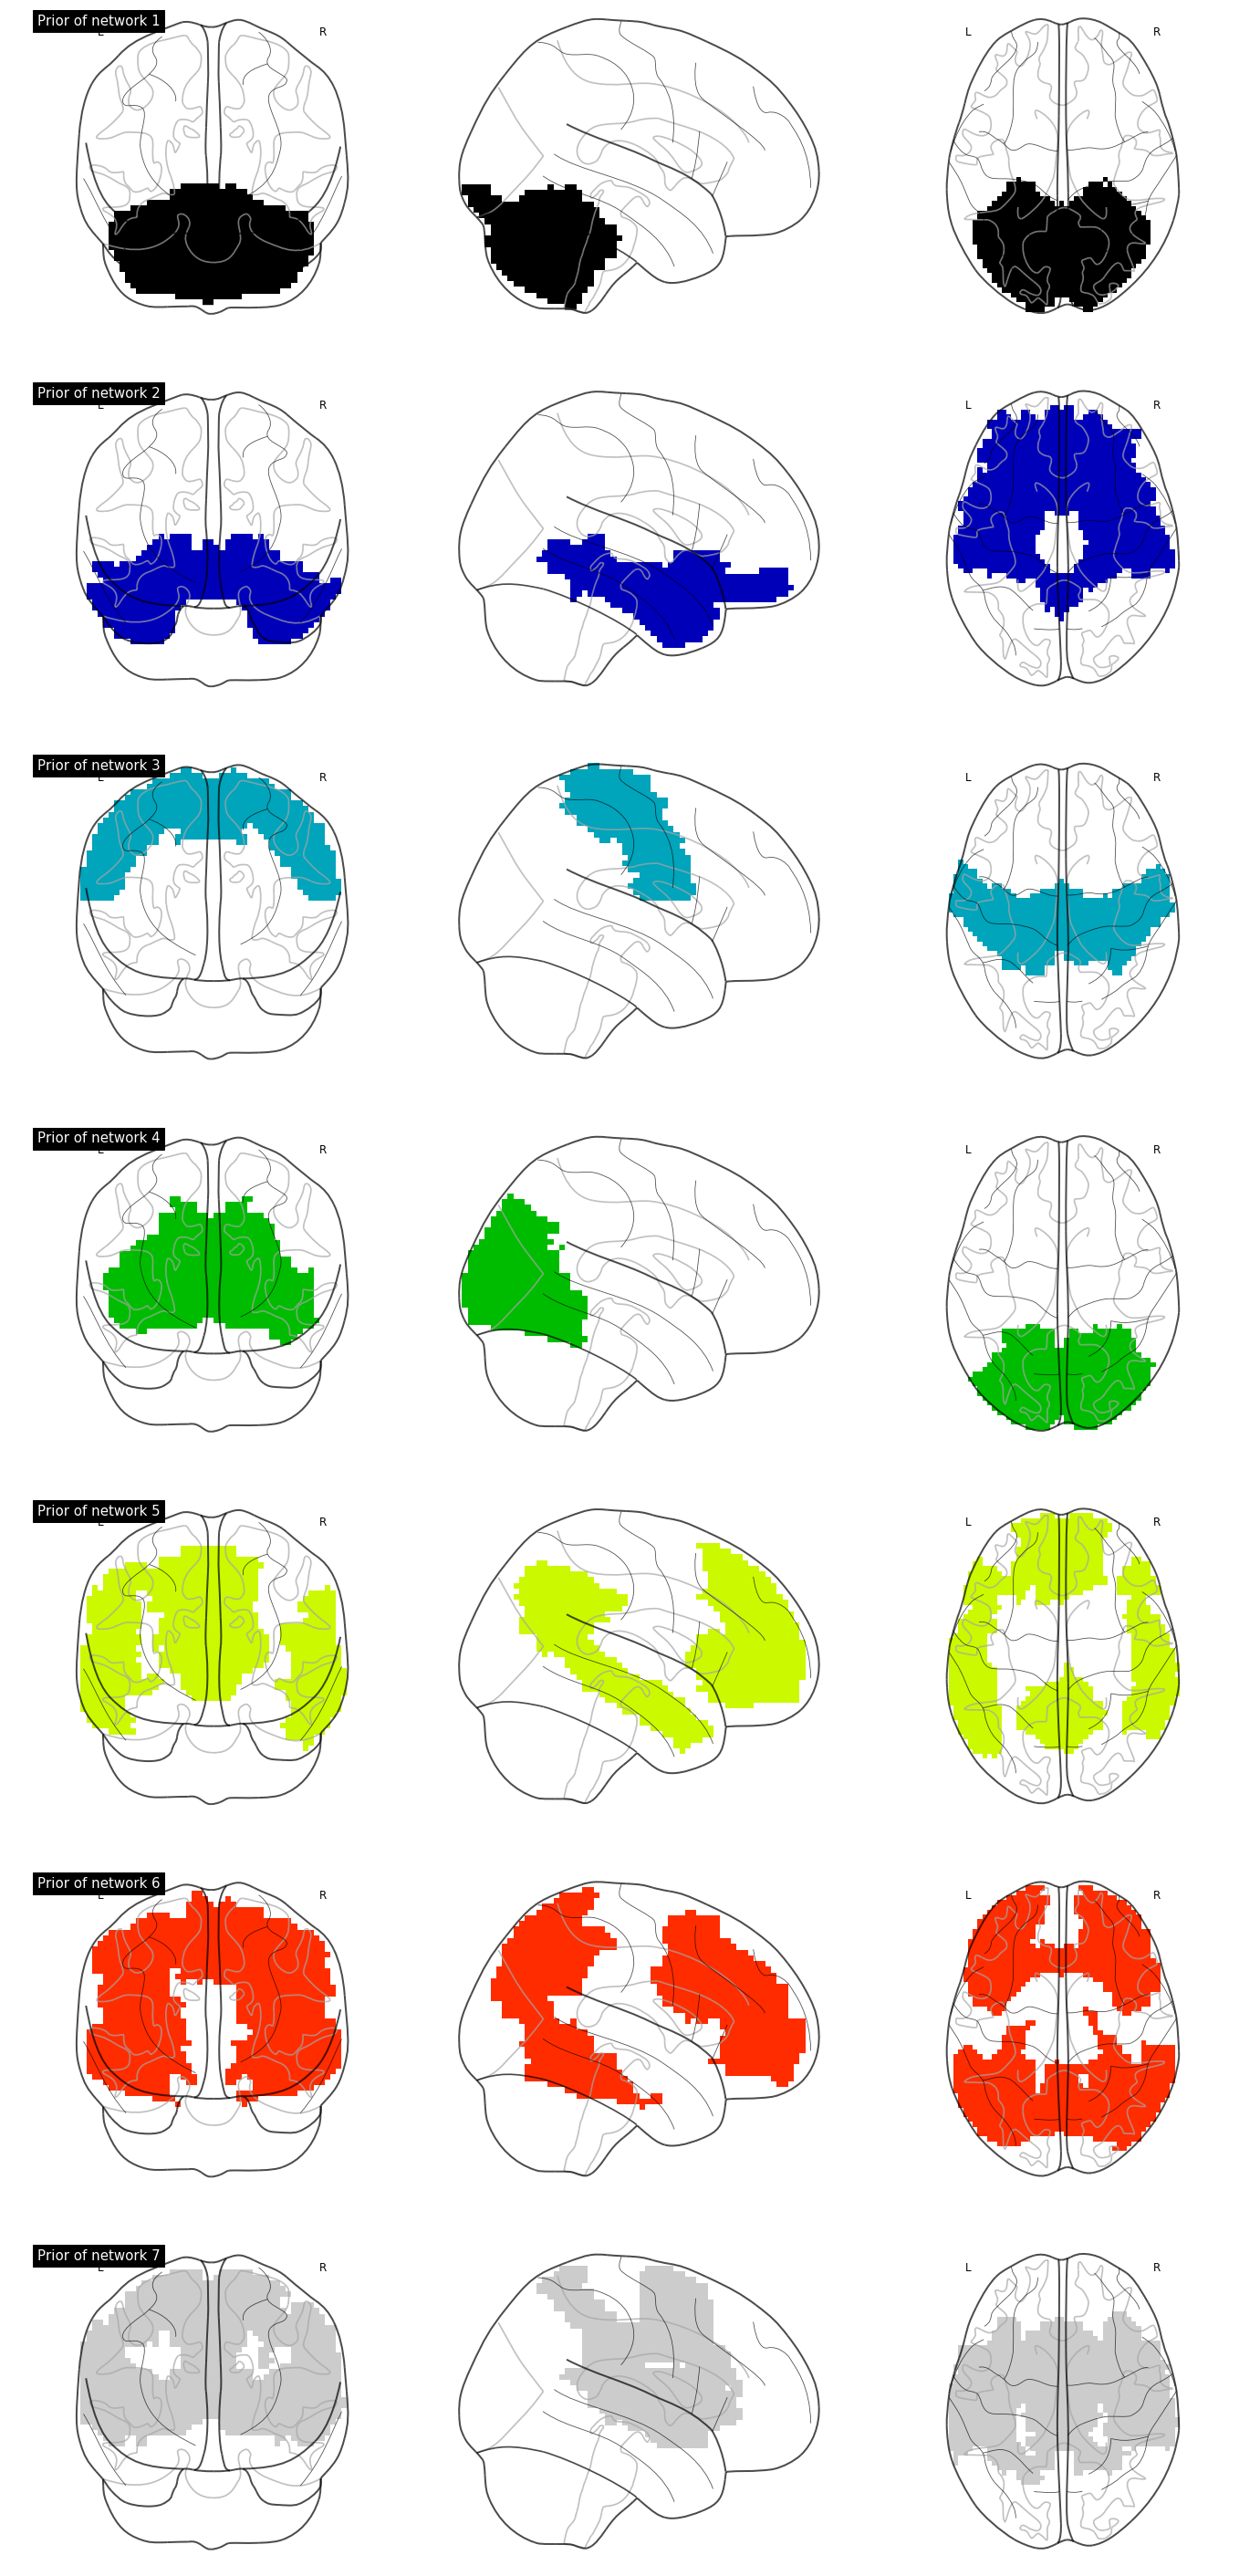

In [15]:
show_scales(7)

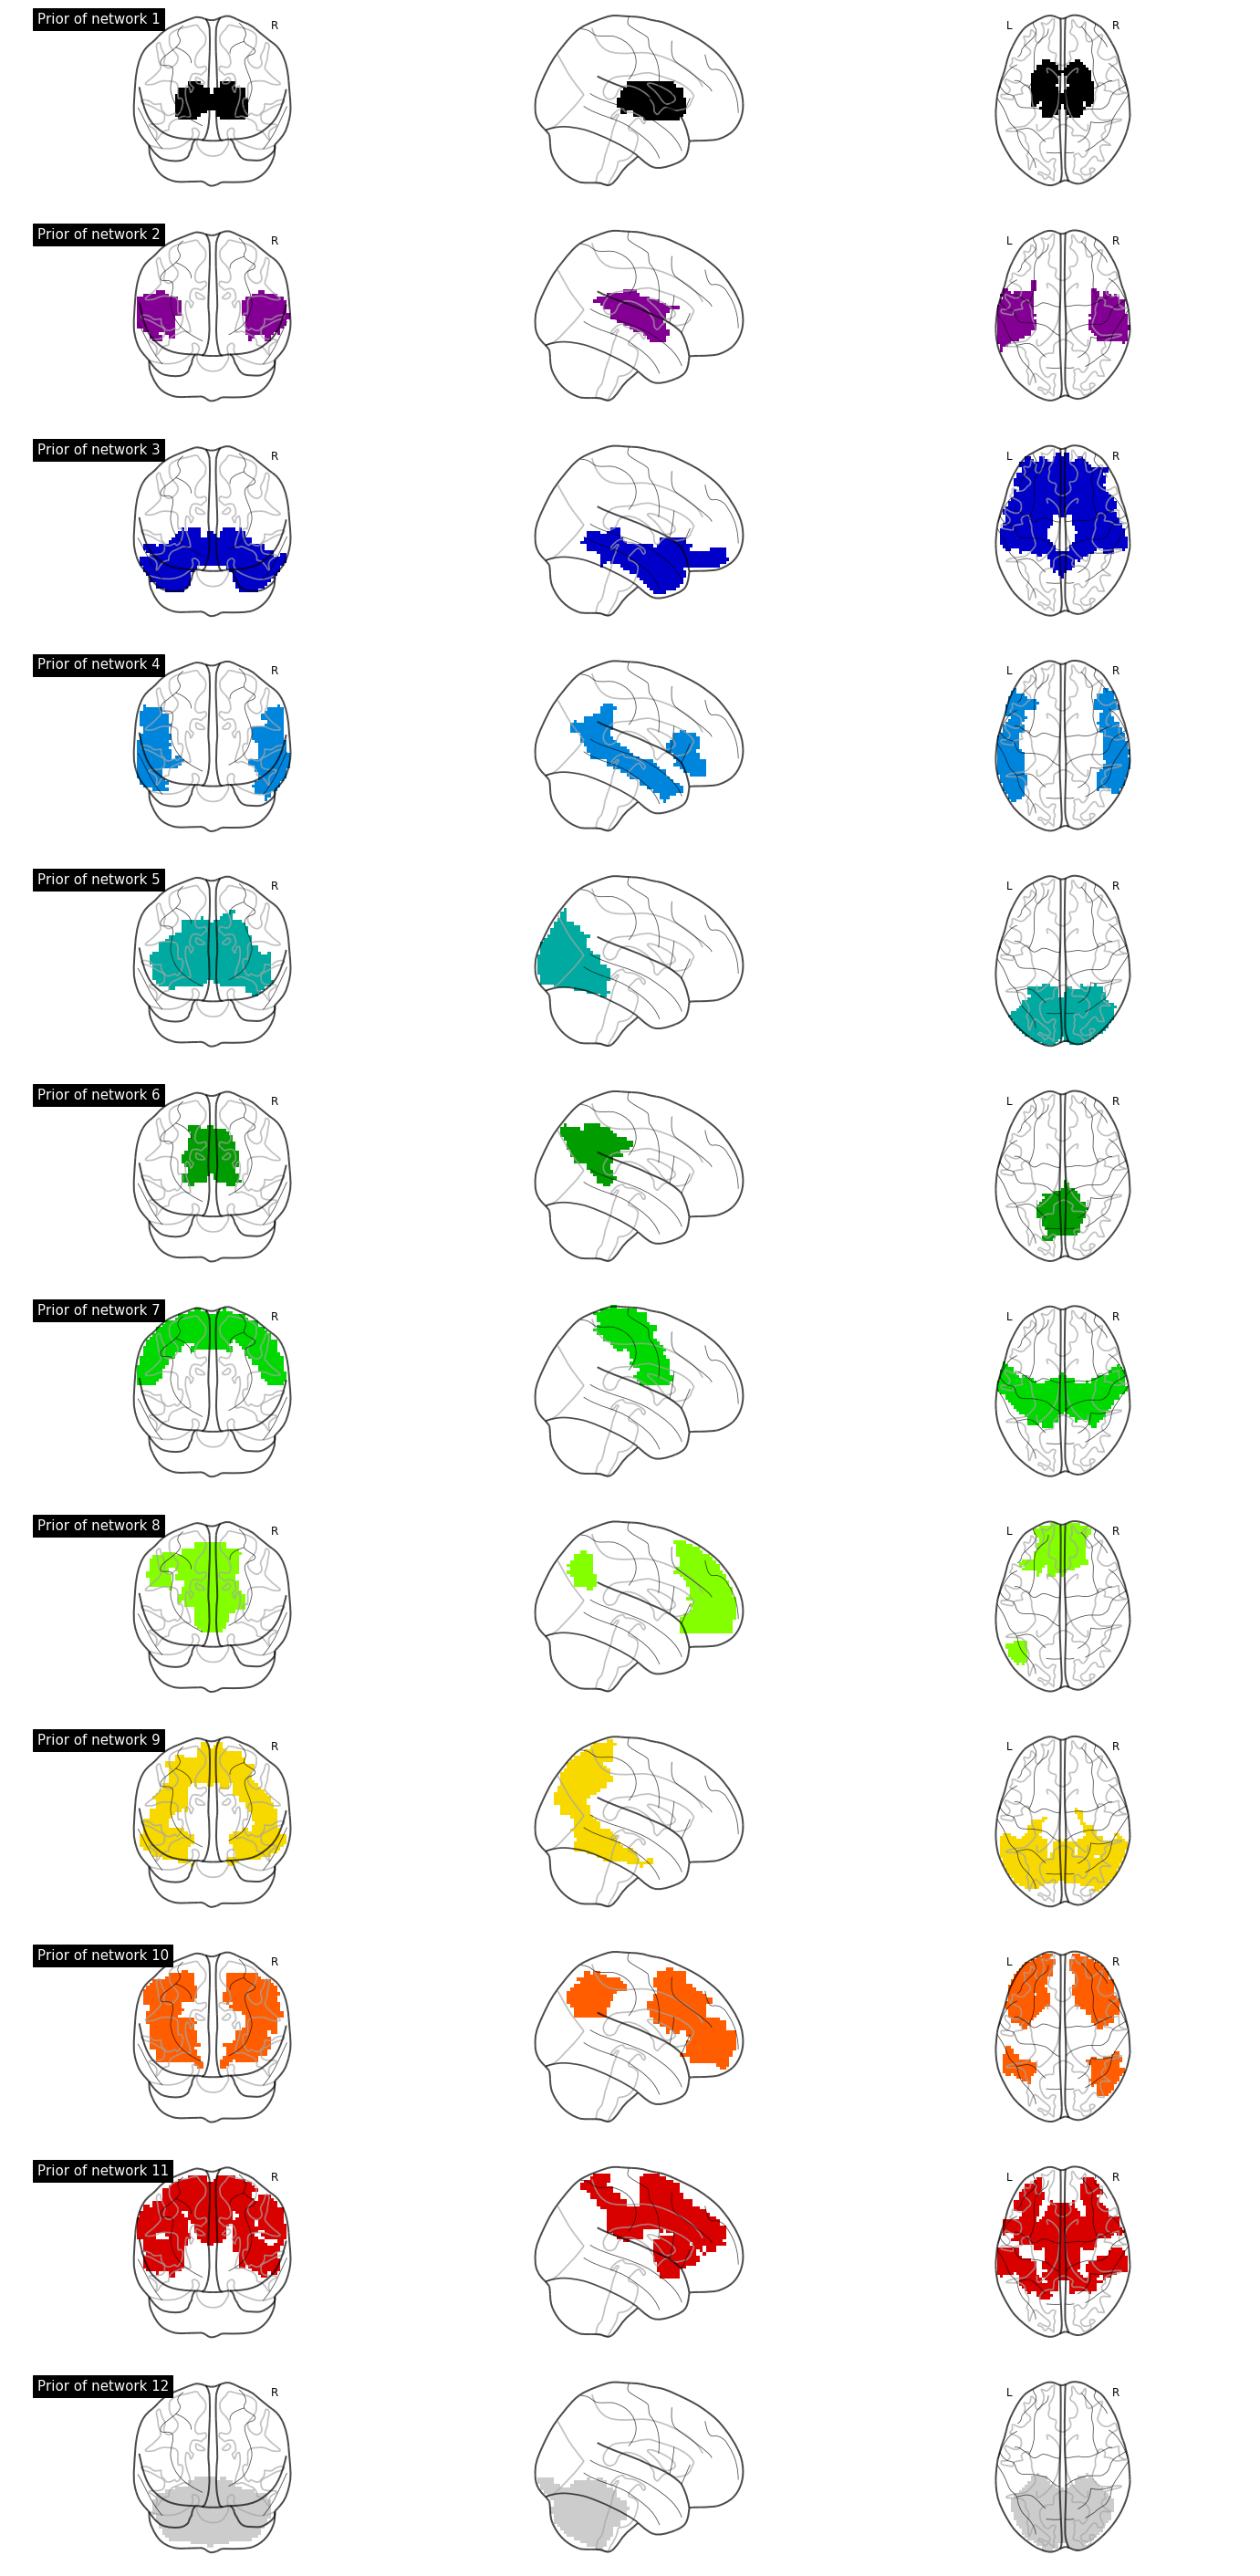

In [17]:
show_scales(12)

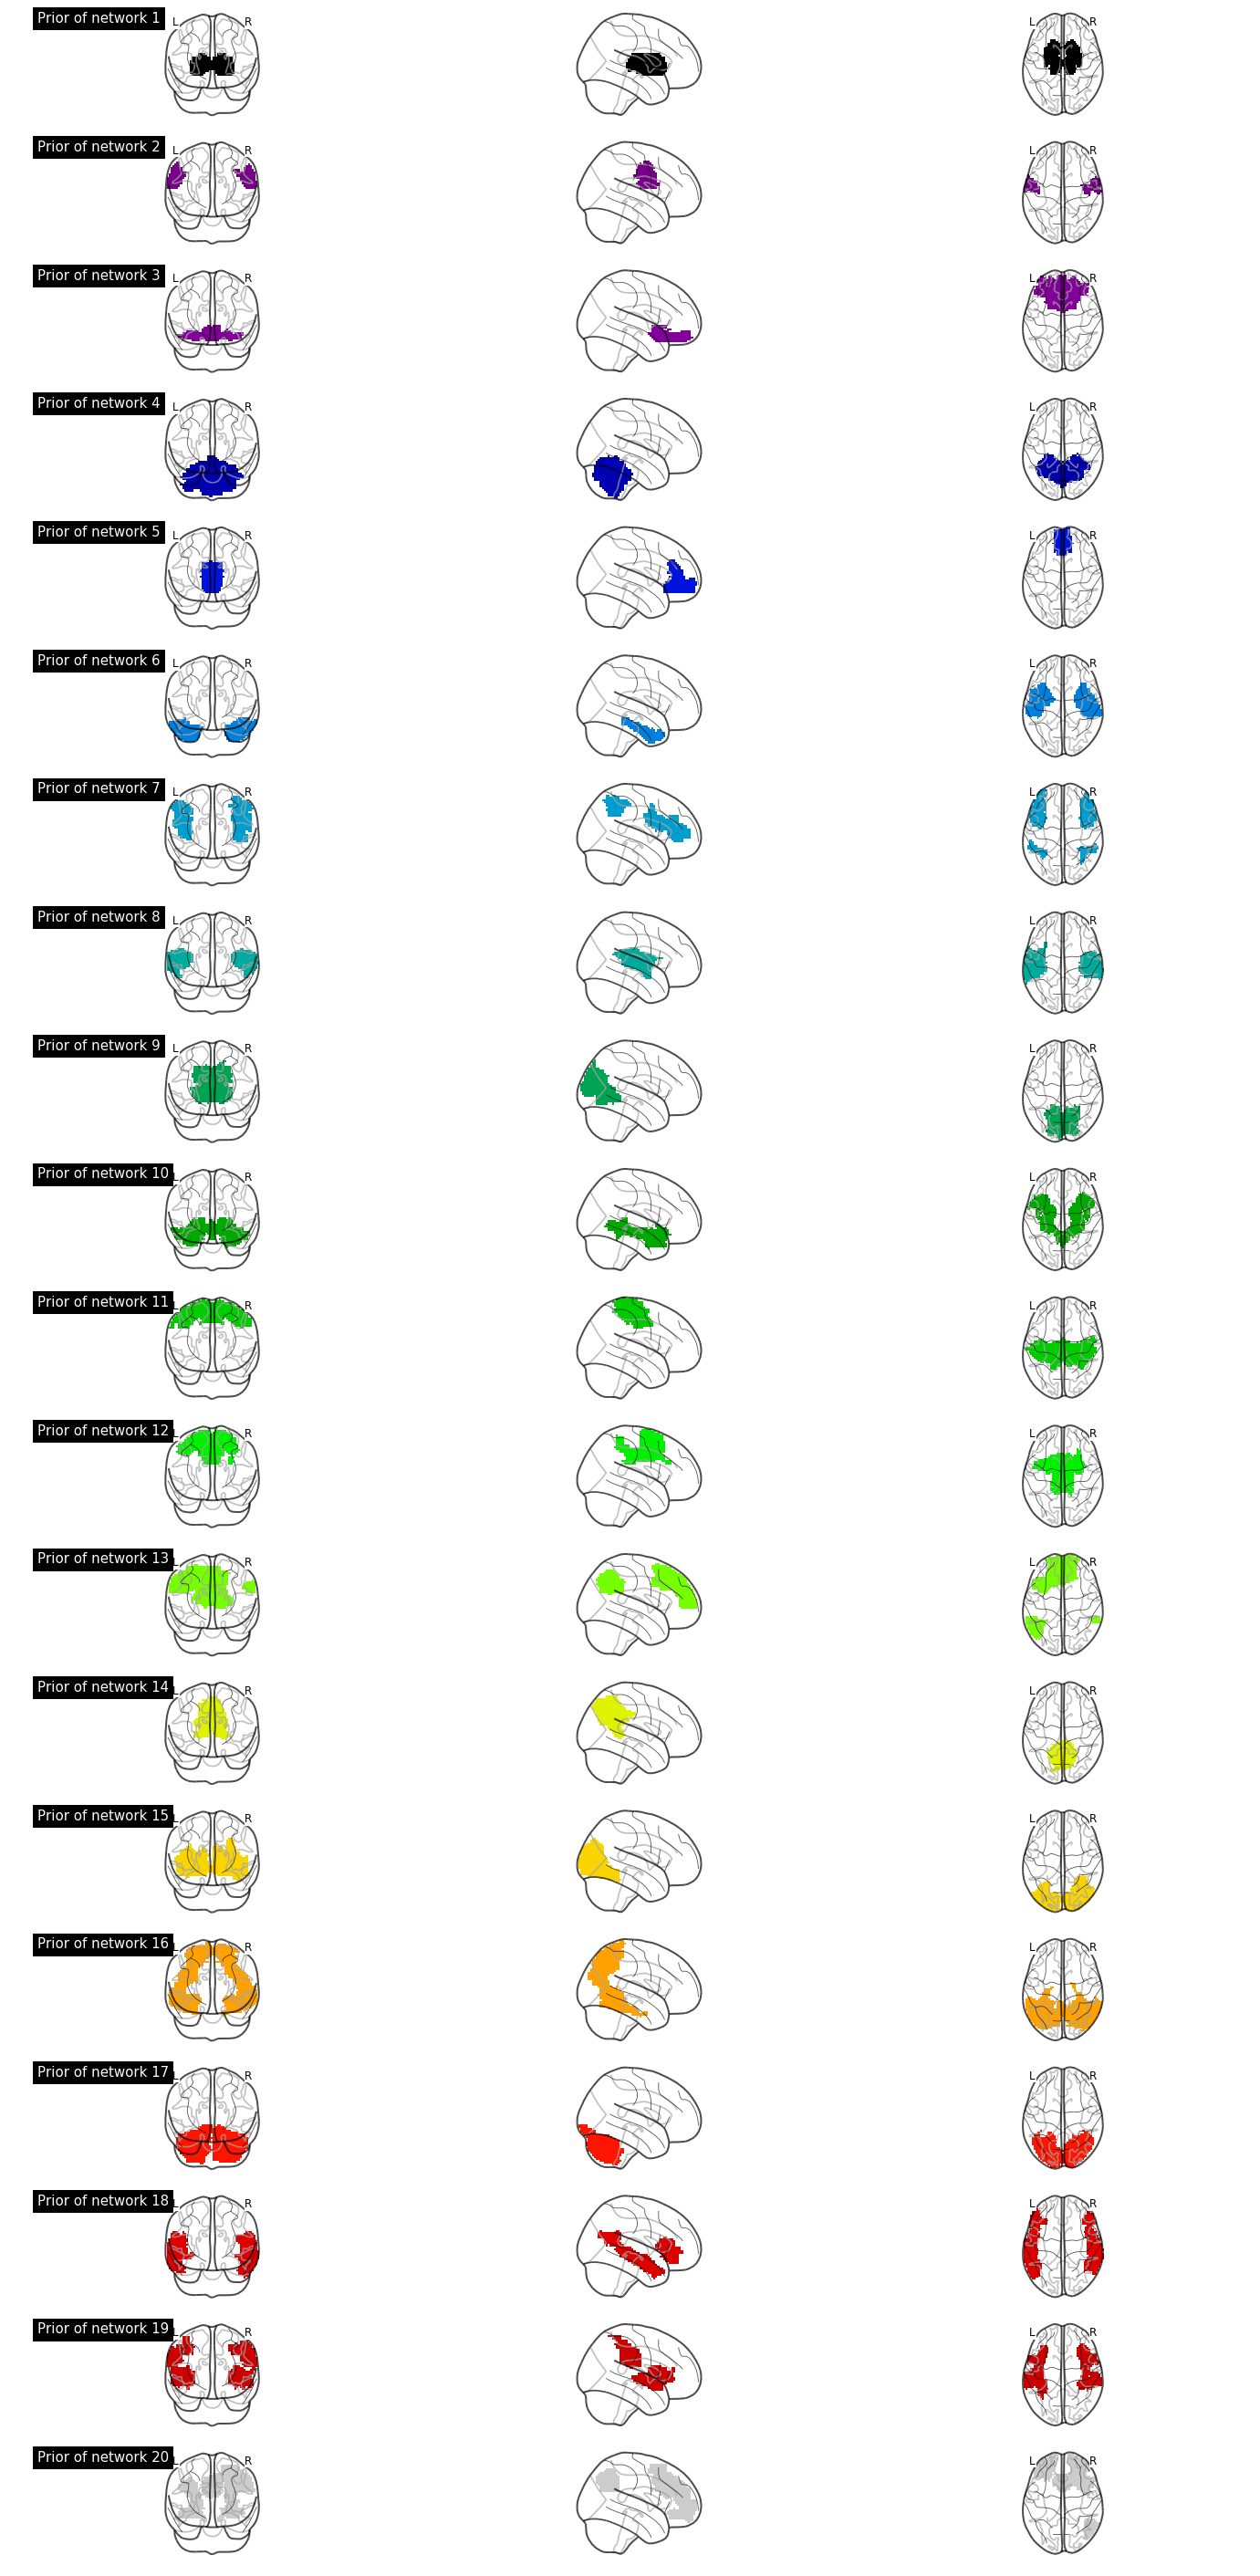

In [18]:
show_scales(20)